# Pyber Analysis

1) The data shows that urban cities account for 68.4% of our rides. However, our drivers distribution is a little mis-proportioned, as they account for 80.9% of our workforce. That can limit the profitability for our drivers in urban cities as demand seem to be lower than supply. Unfortunately, the data does not include missed opportunities (customers who are looking for a ride but could not find a match because there are no available drivers). Having that information can give us a better indication of whether the urban market is saturated or if there is more room for growth.

2) From the data, we can see that trips in Suburban cities are more profitable, as the average total fair is higher than both urban and rural cities. Yet our driver distribution only accounts for 16.5%. Based on this information, I would recommend that we expand our footprint in suburban cities and hire more drivers there.

3) Looking at the bubble graph, we can see which cities we should focus on expanding as the ride demands and average fare is high, yet our workforce is low. This is mainly in suburban cities similar to the analysis above. We can further drill down to which city we should focus on expanding base on this information. On the contrary, urban data would show that some urban cities we may be overstaffed, where the demand for rides and the average fair is low. We will want to limit our growth in those areas.

In [3]:
# Dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read city_data csv file and print to preview data
csvfile_city = "data/city_data.csv"
pyber_city = pd.read_csv(csvfile_city)
print(pyber_city.columns)
print(pyber_city.dtypes)
pyber_city.head()

Index(['city', 'driver_count', 'type'], dtype='object')
city            object
driver_count     int64
type            object
dtype: object


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read ride_data csv file and print to preview data
csvfile_ride = "data/ride_data.csv"
pyber_ride = pd.read_csv(csvfile_ride)
print(pyber_ride.columns)
print(pyber_ride.dtypes)
pyber_ride.head()

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')
city        object
date        object
fare       float64
ride_id      int64
dtype: object


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Merge tables
pyber_data = pd.merge(pyber_ride, pyber_city, on="city", how="left")
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Bubble Plot of Ride Sharing Data

# Create 3 Separate Tables for City Types
# Urban city
urban_city = pyber_data.loc[pyber_data["type"] == "Urban"]

# Suburban city
suburban_city = pyber_data.loc[pyber_data["type"] == "Suburban"]

# Rural city
rural_city = pyber_data.loc[pyber_data["type"] == "Rural"]

In [7]:
# Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban = urban_city.groupby("city")["fare"].mean()
total_rides_urban = urban_city.groupby("city")["ride_id"].count()
total_drivers_urban = urban_city.groupby("city")["driver_count"].mean()

# Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban = suburban_city.groupby("city")["fare"].mean()
total_rides_suburban = suburban_city.groupby("city")["ride_id"].count()
total_drivers_suburban = suburban_city.groupby("city")["driver_count"].mean()

# Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural = rural_city.groupby("city")["fare"].mean()
total_rides_rural = rural_city.groupby("city")["ride_id"].count()
total_drivers_rural = rural_city.groupby("city")["driver_count"].mean()

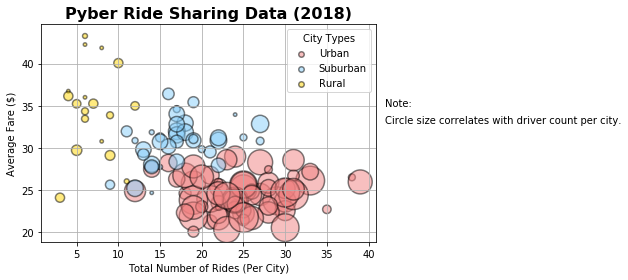

In [8]:
# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(total_rides_urban, avg_fare_urban, s = total_drivers_urban*12,
            facecolors ="lightcoral", edgecolors="black", alpha = 0.5, linewidth = 1.5, label="Urban")

plt.scatter(total_rides_suburban, avg_fare_suburban, s = total_drivers_suburban*12,
            facecolors ="lightskyblue", edgecolors="black", alpha = 0.5, linewidth = 1.5, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural, s = total_drivers_rural*12,
            facecolors ="gold", edgecolors="black", alpha = 0.5, linewidth = 1.5, label="Rural")

#Add title, x axis label and y axis label.
plt.title("Pyber Ride Sharing Data (2018)", fontsize = 16, fontweight="bold")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42, 35,"Note:")
plt.text(42, 33,"Circle size correlates with driver count per city.")

#Add the legend.
legend = plt.legend(loc= "upper right", scatterpoints=1, fontsize=10)
legend.set_title('City Types')
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#Show plot and save image
plt.grid()
plt.savefig("Images/Pyber Ride Sharing Data.png")
plt.show()

# Total Fares by City Type - Pie Chart

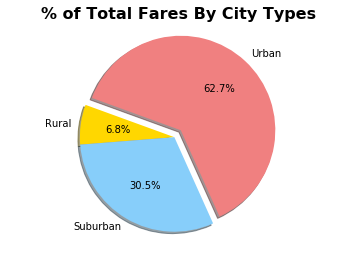

In [9]:
# % of Total Fares by City Type
total_fare = pyber_data.groupby("type")["fare"].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# Set format, show chart and save image
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types", fontsize = 16, fontweight="bold")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()

# Total Rides by City Type - Pie Chart

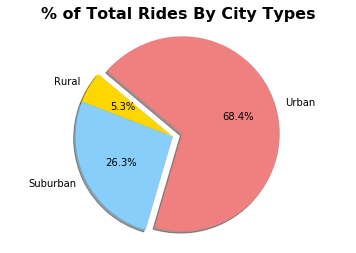

In [12]:
# % of Total Rides by City Type
total_rides = pyber_data.groupby("type")["ride_id"].count()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# Set format, show chart and save image
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types", fontsize = 16, fontweight="bold")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/% of Total Rides By City Types.png")
plt.show()

# Total Drivers by City Type - Pie Chart

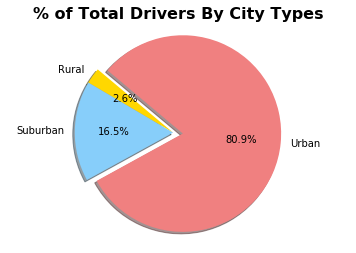

In [13]:
# % of Total Drivers by City Type
total_drivers = pyber_city.groupby("type")["driver_count"].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# Set format, show chart and save image
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types", fontsize = 16, fontweight="bold")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/% of Total Drivers By City Types.png")
plt.show()